![head.png](figures/head.jpg)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

In [4]:
# Packages used in this notebook
import django
import requests

# Django (web-framework)

Have a look at: 
* [https://www.djangoproject.com/](https://www.djangoproject.com/)
* [https://github.com/cafawo/basicdjango](https://github.com/cafawo/basicdjango)

Django is a high-level Python web framework that encourages rapid development and clean, pragmatic design. It's known for its simplicity and robustness, which makes it ideal for web projects with a focus on financial data analytics. A few known users of Django: Instagram, Disqus, Pinterest.

1. **Robustness**: Django's built-in features support quick and efficient web application development.
2. **Admin Interface**: Comes with a built-in admin module, which you can use to visualize and manage your data.
3. **Scalable**: Django applications can handle large volumes of data and traffic, which is essential for financial analysis tools.
4. **Security**: Django provides built-in protection against many security threats like SQL injection, cross-site scripting, cross-site request forgery, etc.



## Setting up a new Django project

We'll set up a basic Django project called "myproject" to demonstrate how you can start integrating Django into your financial analytics projects. Assuming that you have the django package installed, the follwing commands refer to the command line:

```Bash
# 1. Create a new project
django-admin startproject myproject
# Make sure to execute 2. and 3. from the myproject folder
cd myproject

# 2. Migrate
python manage.py migrate

# 3. Start the server
python manage.py runserver
```

This is how the myproject folder should look like:

```Bash
myproject/
│
├── myproject/
│   ├── __init__.py    # Tells Python that this directory should be considered a Python package
│   ├── settings.py    # Contains settings/configuration for this Django project
│   ├── urls.py        # The URL declarations for this Django project; a "table of contents" of your Django-powered site
│   ├── wsgi.py        # An entry-point for WSGI-compatible web servers to serve your project
│   └── asgi.py        # An entry-point for ASGI-compatible web servers to serve your project asynchronously
│
├── db.sqlite3         # This is the project data base, which will be updated by migrate
└── manage.py          # A command-line utility that lets you interact with this Django project
```

All these files have been created by the `startproject` command. With one exception being the **db.sqlite3** file, which has been created by the `migrate` command.

## Dajngo apps

The project is merely a shell, the magic happens within one or multiple apps that we add to the project.

```Bash
python manage.py startapp myapp
```

The folder should now look like this:

```Bash
myproject/
│
├── myproject/
│   ├── __init__.py    # Marks this directory as a Python package
│   ├── settings.py    # Contains settings/configuration for this Django project
│   ├── urls.py        # The URL declarations for this Django project
│   ├── wsgi.py        # Entry-point for WSGI-compatible web servers
│   └── asgi.py        # Entry-point for ASGI-compatible web servers
│
├── myapp/
│   ├── migrations/
│   │   ├── __init__.py # Marks migrations as a Python package
│   │   └── ...         # Other migration files
│   ├── __init__.py     # Marks myapp directory as a Python package
│   ├── admin.py        # Admin panel configuration for myapp
│   ├── apps.py         # Application-specific configuration
│   ├── models.py       # Database models
│   ├── tests.py        # Test cases for myapp
│   ├── views.py        # Views for handling requests
│   └── urls.py         # URL declarations specific to myapp (optional)
│
├── db.sqlite3         # This is the project data base
└── manage.py          # A command-line utility that lets you interact with this Django project
```

After creating the app, we have to register it in settings.py:

```Python
# ...
INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'myapp',  # Add this line
]
# ...
```

## Django's components

The folder structure above corresponds to this:

1. Project and Apps
    - **Project:** The overall configuration and container for your web application, which includes settings for the database, Django-specific options, and application-specific settings.
    - **Apps:** Modular components of a project. Each app is a web application that performs a specific function (e.g., a blog or a database of records). Apps can be reused across multiple projects.

2. Settings
    - Located in `settings.py`, this file includes configurations like database setup, debug mode, static files settings, middleware configurations, and more.

3. URL Dispatcher
    - URL patterns are defined in `urls.py`. Django uses these patterns to match the client request URL to the appropriate view.

4. **Models**
    - Defined in `models.py`, models are Python classes that define the data structure. Django translate these models into database tables.

5. **Views**
    - Located in `views.py`, views are functions or classes that handle requests and return responses. They interact with models to fetch and manage data, and delegate formatting to templates.

6. **Templates**
    - HTML files that use Python-like expressions for dynamic content generation, managed through Django’s template engine.

7. Forms
    - Defined in `forms.py`, forms handle and validate data submitted via HTTP POST requests, simplifying the creation and reuse of web forms.

8. Admin
    - An automatic admin interface provided by Django to manage data in the database using a user-friendly interface.

9. Middleware
    - Middleware are hooks into Django's request/response processing, acting as a low-level plugin system for altering input or output globally.

10. Migrations
    - Located in `migrations/` folders within each app, migrations are Django’s way of propagating changes from models to the database schema.

Each component of Django is designed to ensure the framework remains robust, scalable, and maintainable.


## Cloning a Django project

```Bash
# Clone the project
git clone https://github.com/cafawo/StudySnips.git
# Locate the project folder
cd myproject
```

Let us ensure that all the required packages are installed. To do so, we will create a new conda environment called snipsenv. Please note that we are using a requirements.txt file in pip format, as an alternative to the requirements.yml file that can be created using conda.

```Bash
conda create -c conda-forge --name snipsenv --file requirements.txt
conda activate snipsenv
```

Let's get back to Dajngo:

```Bash
# 2. Migrate
python manage.py migrate

# 3. Start the server
python manage.py runserver

```

Make sure that the server is running and head over to the landing page, e.g. [http://127.0.0.1:8000/](http://127.0.0.1:8000/)

## Dajngo admin

Django comes with a build in admin feature. To access the admin feature, you have to create a user (or superuser ... something like an admin).

```Bash
python manage.py createsuperuser
```

Make sure that the server is running and head over to the admin page, e.g. [http://127.0.0.1:8000/admin/](http://127.0.0.1:8000/admin/). In the specific use case of StudySnips, the admin page allows us to create a class and add snips, which can then be claimed by students.

## Building an API with Django

Let's say we would like to return data on the number of claimed snips. This data could later be displayed in a chart or analyzed in python. 

We need two components:

1. **snips/views.py**, here we will add a function to obtain the data:
    ```Python
    def api_chart_data(request):
        # Filter the Snips where student_id is not empty or null, then group by date
        data = (Snip.objects
                    .filter(student_id__isnull=False, student_id__gt='')
                    .annotate(date=TruncDate('updated_at'))
                    .values('date')
                    .annotate(count=Count('id'))
                    .order_by('date'))
        # Format the data for the chart (date in 'YYYY-MM-DD' format and the count)
        chart_data = [{'date': entry['date'].isoformat(), 'count': entry['count']} for entry in data]
        return JsonResponse(chart_data, safe=False)
    ```

2. **snips/urls.py**, here we will point the api endpoint 'api/chart' to the aforementioned function:
    ```Python
    urlpatterns = [
        # ...
        path('api/chart', views.api_chart_data, name='chart_data'),
        # ...
    ]
    ```

Have a look at our API endpoint [http://127.0.0.1:8000/api/chart](http://127.0.0.1:8000/api/chart), you should see a JSON object with the counts per day. Of course, this data can also be used in python (if the server is running!), e.g.:

In [5]:
# URL to our Django server hosting the API
url = 'http://127.0.0.1:8000/api/chart'

# Make a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data retrieved successfully!")
    print(data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)

Data retrieved successfully!
[{'date': '2024-06-04', 'count': 2}]


## Displaying data using Django and Chart.js

Have a look at: [https://www.chartjs.org/](https://www.chartjs.org/)

You could of course try to display matplotlib files, however, Chart.js creates pretty and interactive charts, see e.g. [https://www.thecvx.com/](https://www.thecvx.com/).

Some more additions to the project:

1. **snips/templates/snips/chart.html**, this time we have to create a whole html template, including all the java script (Chart.js) code. This is the interesting part:
    ```js
    //...
    fetch('/api/chart')
        .then(response => response.json())
        .then(data => {
            const dates = data.map(item => item.date);
            const counts = data.map(item => item.count);
            const chart = new Chart(ctx, {
                type: 'bar', // Changed to 'bar' chart type
                data: {
                    labels: dates,
                    datasets: [{
                        label: 'Claimed Snips per Day',
                        data: counts,
                        backgroundColor: 'rgba(75, 192, 192, 0.2)', // Light blue fill
                        borderColor: 'rgb(75, 192, 192)', // Solid blue border
                        borderWidth: 1
                    }]
    //...
    ```

2. **snips/views.py**, not much to do here, just point at the template:
    ```Python
    def chart_page(request):
        return render(request, 'snips/chart.html')
    ```

3. **snips/urls.py**, here we will point to the aforementioned function:
    ```Python
    urlpatterns = [
        # ...
        path('chart/', views.chart_page, name='chart_page'),
        # ...
    ]
    ```

## Using data models

Data models in Django serve as the **blueprint for creating database tables**. They define the structure of the stored data, including the fields and their types, relationships, and constraints. Here’s how they work:

1. **Definition**: Models in Django are Python classes that inherit from `django.db.models.Model`. Each attribute of the class represents a database field.

2. **Fields**: Django supports various types of fields to specify the type of data each attribute holds, such as `CharField` for character strings, `IntegerField` for integers, `DateField` for dates, and many more.

3. **Relationships**: Django models can define relationships between each other using fields like `ForeignKey` (for many-to-one relationships), `ManyToManyField` (for many-to-many relationships), and `OneToOneField` (for one-to-one relationships).

4. **Metadata**: Models can also include metadata by using an inner class called `Meta`, where you can define things like ordering options, database table names, and other attributes that don’t fit into the field type category.

5. **ORM**: Django models use Django’s ORM (Object-Relational Mapping) to provide an abstraction to manipulate the database without having to write raw SQL. This allows developers to interact with the database using Python code.

6. **Migrations**: Changes to models (like adding a new field) are handled through migrations, which are automatically generated scripts that adjust the database structure accordingly.

Django data models simplify the management of database operations, making it easy to create, retrieve, update, and delete records, thus providing a high-level interface to interact with the underlying database.

Our [StudySnips](https://github.com/cafawo/StudySnips) project uses 3 data models:

1. Classroom
2. Snipsheet
3. Snip

The design follows the admin process of the project (remember the admin function above).

**StudySnips/snips/models.py**:
```Python
class Classroom(models.Model):
    classroom_id = models.CharField(max_length=3, primary_key=True, editable=False)
    name = models.CharField(max_length=255)
    semester = models.CharField(max_length=255)
    school = models.CharField(max_length=255)
    email = models.EmailField(max_length=254, blank=True, null=True)
    updated_at = models.DateTimeField(auto_now=True)  # Automatically update timestamp when the object is saved

    def save(self, *args, **kwargs):
        # Assign a random ID when creating a new classroom
        if not self.classroom_id:
            # Ensure that the ID is unique
            while True:
                new_id = ''.join(random.choices(string.ascii_lowercase + string.digits, k=3))
                if not Classroom.objects.filter(classroom_id=new_id).exists():
                    self.classroom_id = new_id
                    break
        super(Classroom, self).save(*args, **kwargs)

    def __str__(self):
        return self.classroom_id


class Snipsheet(models.Model):
    # Note that each snip sheet belongs to a classroom (if classroom is deleted, so is snipsheet)
    classroom = models.ForeignKey(Classroom, related_name='snipsheets', on_delete=models.CASCADE)
    snipsheet_id = models.CharField(max_length=255, unique=True, editable=False)
    updated_at = models.DateTimeField(auto_now=True)  # Automatically update timestamp when the object is saved

    # We create snips together with the snip sheet (note that this happens in the save method below)
    def create_snips(self):
        # We need to know the old snip IDs in order to create new ones
        existing_snip_ids = set(Snip.objects.filter(snipsheet__classroom=self.classroom)
                                  .values_list('snip_id', flat=True))
        # Generate new snip IDs
        new_snip_ids = set()
        while len(new_snip_ids) < 35:
            random_string = ''.join(random.choices(string.ascii_lowercase + string.digits, k=6))
            new_id = self.classroom.classroom_id + random_string
            # Ensure uniqueness of IDs
            if new_id not in existing_snip_ids:
                new_snip_ids.add(new_id)
                existing_snip_ids.add(new_id)
        for code in new_snip_ids:
            Snip.objects.create(snip_id=code, snipsheet=self)

    def save(self, *args, **kwargs):
        # Check if we are creating a new snip sheet
        if not self.snipsheet_id:
            # Generate snipsheet_id based on classroom_id and number of snipsheets for this classroom
            snipsheet_count = Snipsheet.objects.filter(classroom=self.classroom).count() + 1
            self.snipsheet_id = '{}_{}'.format(self.classroom.classroom_id, snipsheet_count)
        super(Snipsheet, self).save(*args, **kwargs)
        # The creation of snips is moved here to ensure snipsheet_id is set before creating snips
        self.create_snips()
        # Finally, create a pdf file with qr-codes for the snips
        create_snipsheet_pdf(self.snips.all().values_list('snip_id', flat=True), self.snipsheet_id)

    def __str__(self):
        return self.snipsheet_id


class Snip(models.Model):
    # Each snip belongs to a snip sheet (if snipsheet is deleted, so is the snip)
    snipsheet = models.ForeignKey(Snipsheet, related_name='snips', on_delete=models.CASCADE)
    snip_id = models.CharField(max_length=9)
    student_id = models.CharField(max_length=255, blank=True, null=True)
    updated_at = models.DateTimeField(auto_now=True)  # Automatically update timestamp when the object is saved
    claim_attempts = models.IntegerField(default=0)  # This increments every time a student tries to claim this snip
    
    def __str__(self):
        return self.snip_id
```

In order to use Django's build in admin function to make changes to the data, we have to modify **StudySnips/snips/admin.py**:

```Python
from django.contrib import admin
from .models import Classroom, Snipsheet, Snip

class ClassroomAdmin(admin.ModelAdmin):
    list_display = ('classroom_id', 'name', 'semester', 'school', 'email', 'updated_at')

class SnipsheetAdmin(admin.ModelAdmin):
    list_display = ('snipsheet_id', 'classroom_id', 'updated_at')
    list_filter = ('classroom_id',)

class SnipAdmin(admin.ModelAdmin):
    list_display = ('snip_id', 'student_id', 'snipsheet', 'get_classroom_id', 'updated_at', 'claim_attempts')
    search_fields = ('student_id', 'snip_id')
    list_filter = ('snipsheet',)

    def get_classroom_id(self, obj):
        return obj.snipsheet.classroom.classroom_id
    get_classroom_id.short_description = 'Classroom ID'  # Set column name

admin.site.register(Classroom, ClassroomAdmin)
admin.site.register(Snipsheet, SnipsheetAdmin)
admin.site.register(Snip, SnipAdmin)
```

## Django forms

How to interact with the model outside of the admin function? The answer is **forms**, which can be embedded into views and ultimately html, e.g.:

```Python
class SnipForm(forms.Form):
    snip_id = forms.CharField(label='', widget=forms.TextInput(attrs={'placeholder': 'Snip ID', 'class': 'form-control'}), max_length=11)
    student_id = forms.CharField(label='', widget=forms.TextInput(attrs={'placeholder': 'Student ID', 'class': 'form-control'}), max_length=100)

    def clean_snip_id(self):
        data = self.cleaned_data['snip_id']
        normalized_data = data.replace('-', '').lower()
        if len(normalized_data) != 9:
            raise forms.ValidationError("Ensure that the Snip ID is 9 characters long.")
        return normalized_data
```

## Deploy your Django project on pythonanywhere.com

Here is the complete guide: https://help.pythonanywhere.com/pages/DeployExistingDjangoProject/

Follow these key steps to deploy your Django project on PythonAnywhere:

1. **Create a PythonAnywhere Account**:
   - Sign up at [PythonAnywhere](https://www.pythonanywhere.com/). Choose the plan that fits your needs (there’s a free tier available).

2. **Set Up a Virtual Environment**:
   - Once logged in, access the "Consoles" tab and create a new Bash console.
   - Create a virtual environment using Python's `virtualenv` or `venv` module to isolate your project dependencies.
   
   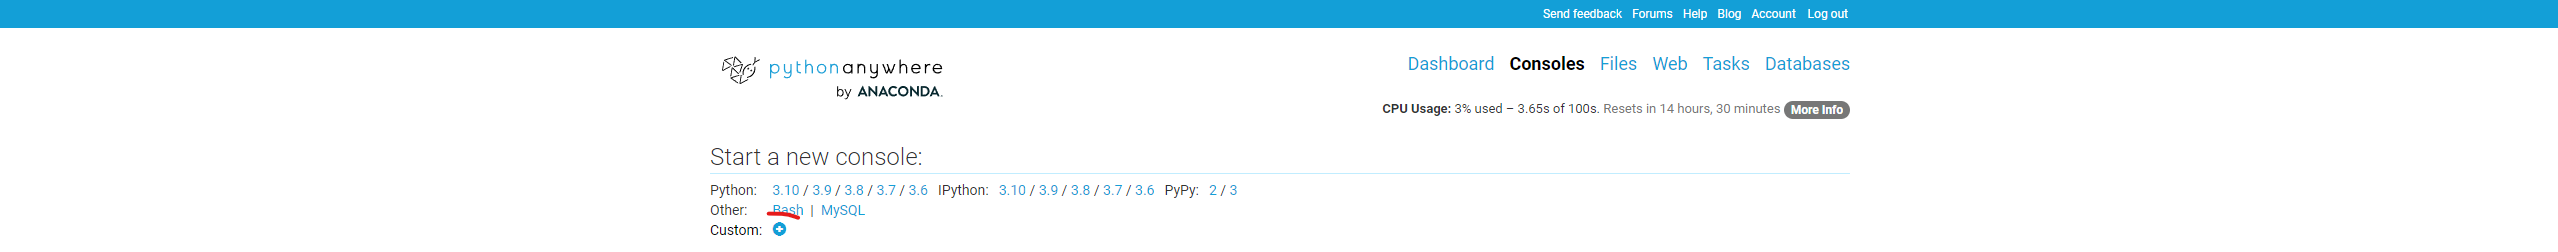

3. **Install Dependencies**:
   - Activate your virtual environment in the Bash console.
   - Install your project’s dependencies by running `pip install -r requirements.txt`, assuming you have a `requirements.txt` file that lists them.

4. **Upload Your Django Project**:
   - You can upload your project files using PythonAnywhere's built-in file uploader or via a version control system like Git.
   - Another method is to directly **clone your project from a Git repository** if your project is hosted on GitHub, GitLab, or another similar service.
   - You should set `DEBUG = False` and add pythonanywhere to the `ALLOWED_HOSTS = []`:

   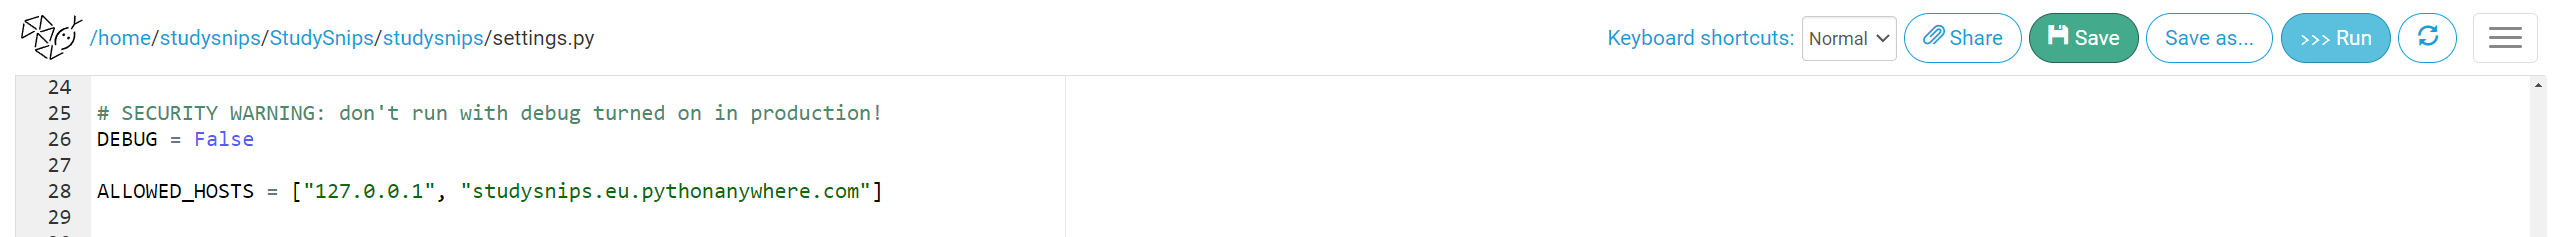


5. **Configure the WSGI File**:
   - PythonAnywhere requires a WSGI configuration file to serve your Django app.
   - Edit the WSGI file in the 'Web' tab to point to your Django project. This typically involves setting the correct path to your project and adjusting the `DJANGO_SETTINGS_MODULE` environment variable.

   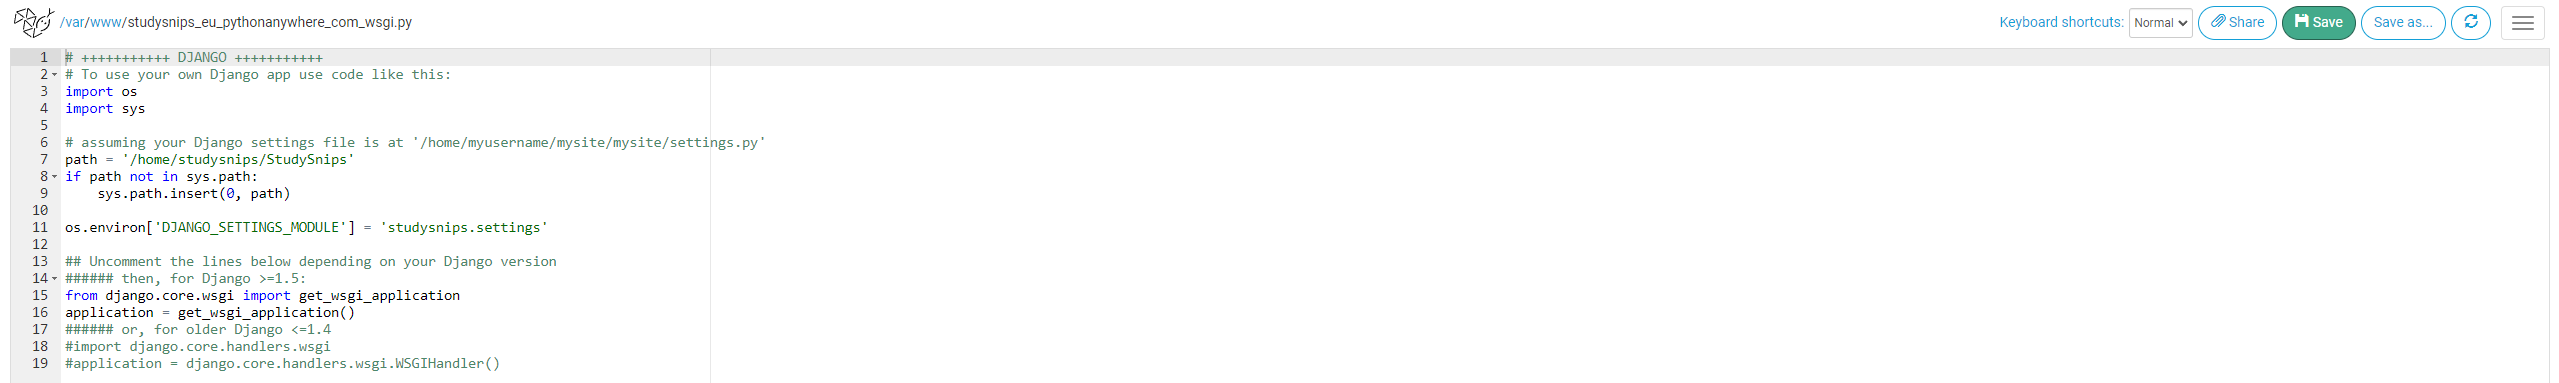

6. **Set Up Static and Media Files**:
   - Configure settings for handling static files and media files in your Django settings. PythonAnywhere serves these files from separate servers, so they need to be collected and configured properly.
   - Use the `collectstatic` command of Django to collect all static files in your specified directory.

   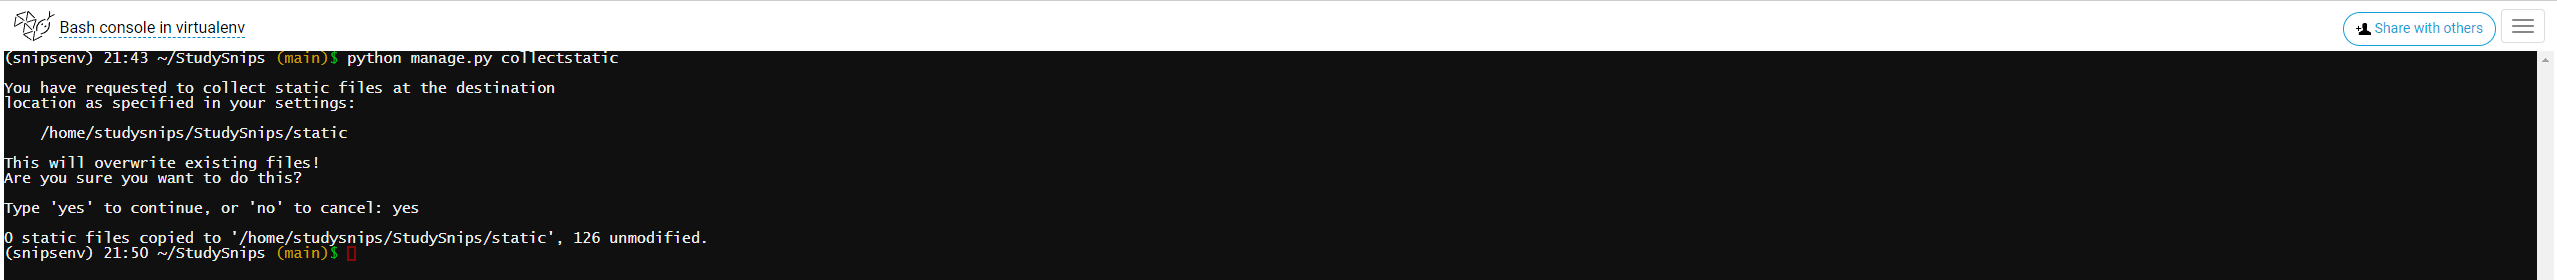

7. **Configure Your Database**:
   - If you’re using SQLite, your existing database file can be uploaded directly. Make sure it’s referenced correctly in your settings.
   - For external databases (like MySQL, PostgreSQL), configure the database settings in Django to connect to PythonAnywhere’s database service or another external database service.
   - Alternatively (if you want to start fresh) you can ``python manage.py migrate`` the project and create a new database.

   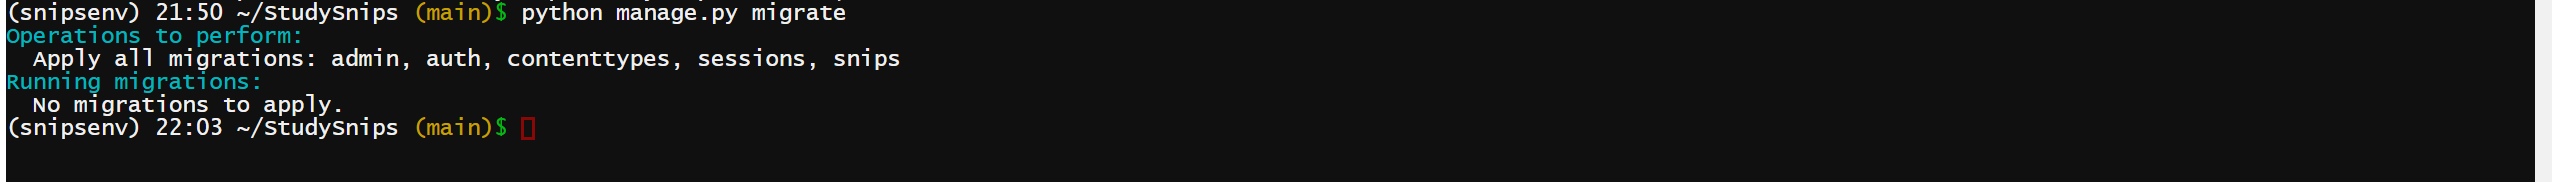

7. **Configure Web App**:
   - Go to the "Web" tab and link to the source code, working directory and virtual environment
   
   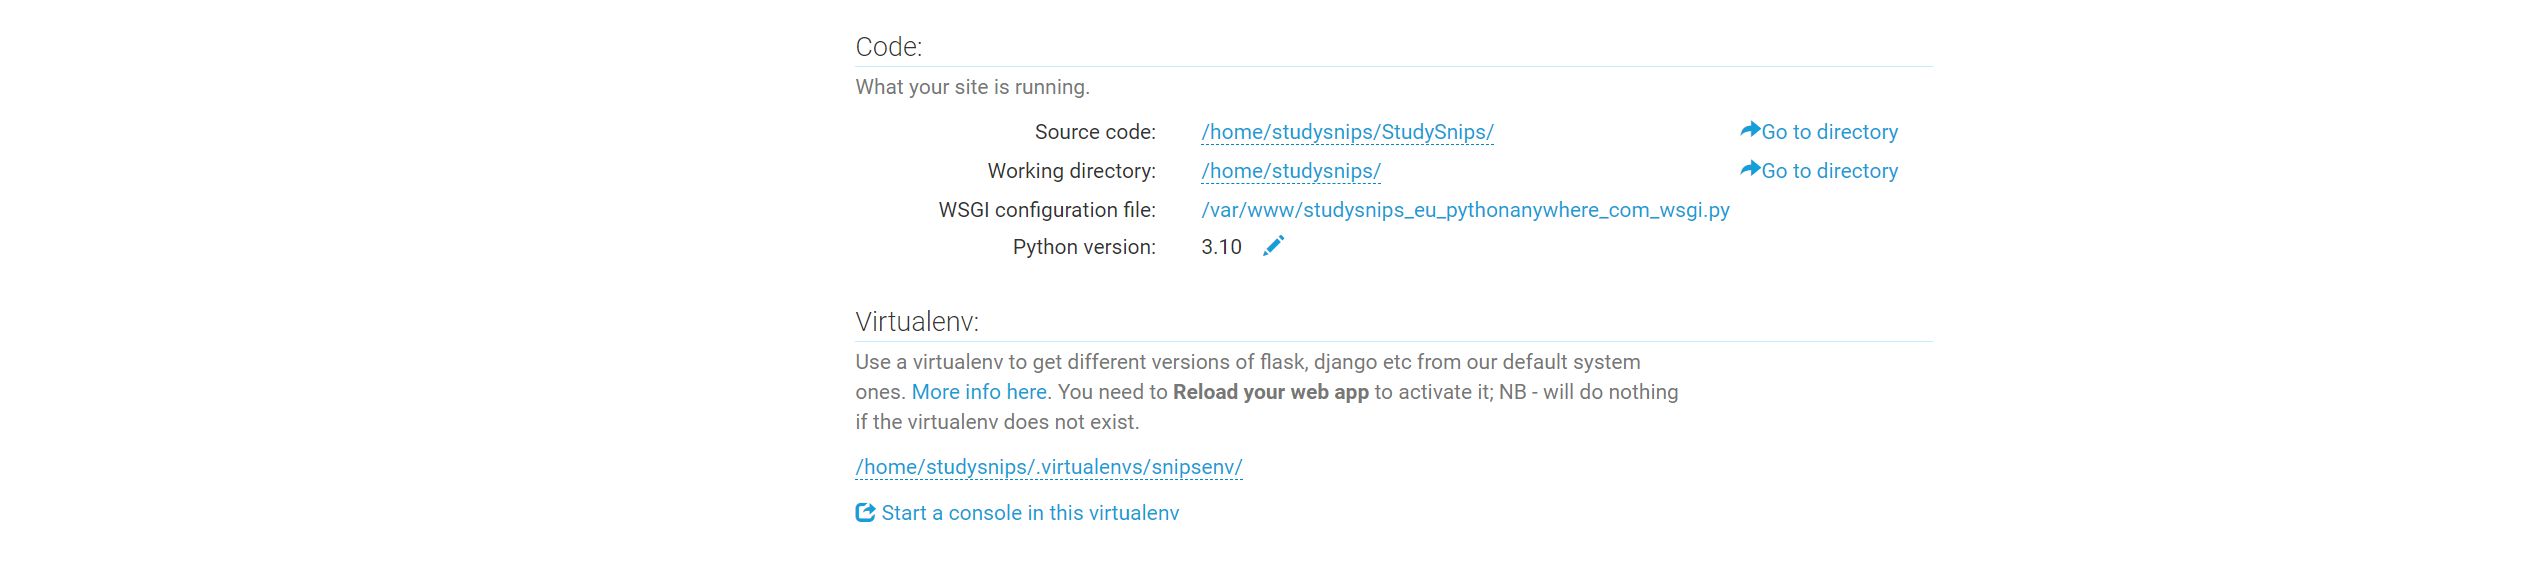

9. **Check Your Deployment**:
   - Go to the 'Web' tab on PythonAnywhere and hit 'Reload' on your web app. This makes PythonAnywhere restart your app with the new code and configuration.
   - Access your project’s URL provided by PythonAnywhere to see your live site. For example: [studysnips.eu.pythonanywhere.com](http://studysnips.eu.pythonanywhere.com/)
   - **Consider setting a password for sites that are under development when you don't want anyone to see them yet (Web tab).**

10. **Debugging (if necessary)**:
   - If something goes wrong, check the error logs provided in the 'Web' tab. PythonAnywhere's logs can provide insight into what might be misconfigured or causing errors.